**5. [0-7 points] Using the dataset in Ex.4, consider variables x and y as coordinates and plot the heatmap of the average temperature in each (x,y) cell for the months of January and July. Then, using only the four columns FFMC, DMC, DC, ISI as variables, plot an UMAP embedding of the dataset coloring the datapoints according to the month column. Discuss the two obtained visualizations.**

Using the dataset in Ex.4, consider variables x and y as coordinates and plot the heatmap of the average temperature in each (x,y) cell for the months of January and July.

In [106]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef
import seaborn as sns
import umap
import umap.umap_ as umap
import pandas as pd
import numpy as np
import csv

%matplotlib inline

sns.set(context='notebook', style='white', rc={'figure.figsize':(14, 10)})

In [147]:
df = pd.read_csv("https://raw.githubusercontent.com/elissrigoni/DataViz/main/Text_10Jan20/forestfires.csv")
df = df[(df.month == 'jan') | (df.month == 'jul')]
df.reset_index(inplace = True)
df

KeyboardInterrupt: 

We now group by all x and y and then compute the mean temperature of all values whose x and y are the same.

In [112]:
df2 = new_df.groupby(['X','Y']).agg('mean').reset_index()
lst = []
for i, j, z in zip(df2.X, df2.Y, df.temp):
    lst.append((i, j, z))      
lst

[(1, 2, 23.3),
 (1, 4, 23.0),
 (2, 2, 5.3),
 (2, 4, 18.0),
 (2, 5, 16.6),
 (3, 4, 24.8),
 (4, 3, 24.6),
 (4, 4, 13.4),
 (4, 5, 23.4),
 (5, 4, 12.6),
 (6, 3, 22.1),
 (6, 6, 24.2),
 (7, 4, 24.3),
 (7, 6, 18.7),
 (8, 6, 25.3),
 (9, 4, 22.9),
 (9, 9, 26.9)]

In [124]:
mat = np.zeros((10, 10))

# we put all averages in the linked coordinate space
for (x,y,m) in lst:
    mat[x, y] = m
    
#reversed Y values
for i in range(len(mat)):
    mat[i] = mat[i][::1]
    
mat

array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. , 23.3,  0. , 23. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  5.3,  0. , 18. , 16.6,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. , 24.8,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , 24.6, 13.4, 23.4,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. , 12.6,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , 22.1,  0. ,  0. , 24.2,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. , 24.3,  0. , 18.7,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. , 25.3,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. , 22.9,  0. ,  0. ,  0. ,  0. , 26.9]])

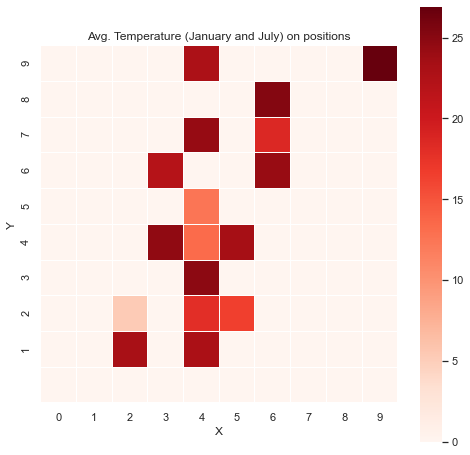

In [125]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))

sns.heatmap(mat[::-1], cmap = 'Reds', xticklabels = np.arange(0, 10), yticklabels = np.arange(9, 0, -1),
            linewidths = 0.01)

plt.title('Avg. Temperature (January and July) on positions')

plt.xlabel('X')
plt.ylabel('Y')

ax.yaxis.set_ticks_position('none'), ax.xaxis.set_ticks_position('none')


ax.set_aspect('equal')

plt.show()

Then, using only the four columns FFMC, DMC, DC, ISI as variables, plot an UMAP embedding of the dataset coloring the datapoints according to the month column. Discuss the two obtained visualizations.

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import matthews_corrcoef
import seaborn as sns
import umap
import umap.umap_ as umap
import pandas as pd
import numpy as np
import csv


import matplotlib.pyplot as plt
%matplotlib inline

sns.set(context='notebook', style='white', rc={'figure.figsize':(14, 10)})

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/elissrigoni/DataViz/main/Text_10Jan20/forestfires.csv")
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [3]:
X = df[['FFMC', 'DMC', 'DC', 'ISI']]
df['month'] = df['month'].astype('category')
Y = df.month

In [4]:
reducer = umap.UMAP(n_components = 2, n_neighbors = 30, min_dist = 0.3, random_state = 42)


In [5]:
X = StandardScaler().fit_transform(X)

In [6]:
embedding = reducer.fit_transform(X)
embedding

array([[ 6.7114806, -3.8784175],
       [10.286922 ,  9.687309 ],
       [10.527092 ,  9.986207 ],
       ...,
       [10.03642  , -3.8843663],
       [-0.4429302,  4.2361307],
       [ 8.357855 , -4.8681426]], dtype=float32)

Text(0.5, 1.0, 'UMAP projection of the Fire Forest')

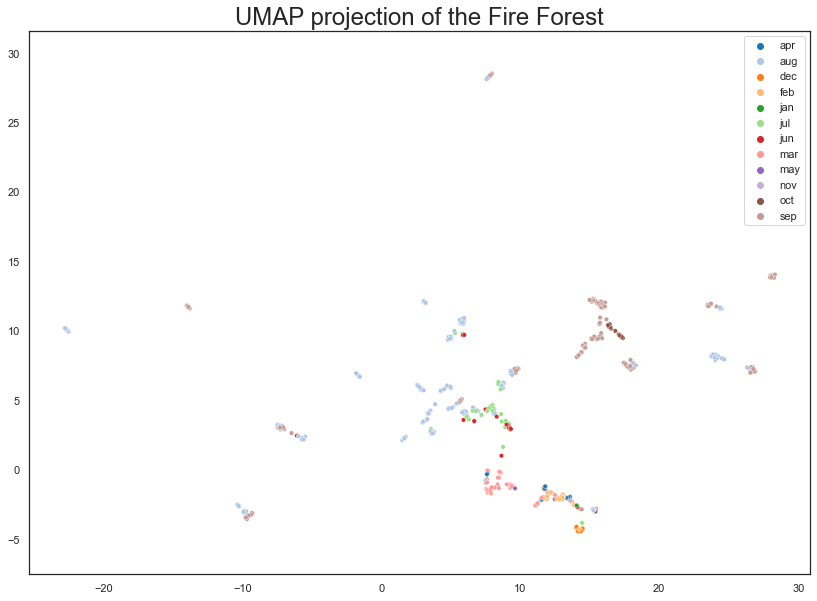

In [196]:
sns.scatterplot(x = embedding[:, 0], y = embedding[:, 1], s = 20, hue = df.month, palette = sns.color_palette('tab20', 12))
plt.gca().set_aspect('equal', 'datalim')
plt.legend(bbox_to_anchor = (1, 1))
plt.title('UMAP projection of the Fire Forest', fontsize=24)

To me it seems that some months are somehow clustered. In particular I see three clusters:

* we can find july observations mainly near to (9,5)
* that has mainly march, may and april and september (9, 0)
* (13, 30) that contains mainly september and october.
* the ones that tend to be spread apart are september and august, by the way.

Summing up, seems like march and july are well clustered, the other months are more spreaded.